### 0. Initialization
Importing all necessary libraries and specifying the inputs

In [1]:
import os
import topogenesis as tg
import pyvista as pv
import trimesh as tm
import numpy as np

# convert mesh to pv_mesh
def tri_to_pv(tri_mesh):
    faces = np.pad(tri_mesh.faces, ((0, 0),(1,0)), 'constant', constant_values=3)
    pv_mesh = pv.PolyData(tri_mesh.vertices, faces)
    return pv_mesh

In [2]:
envelope_path = os.path.relpath('../data/meshes/compulsory_envelope.obj')
context_path = os.path.relpath('../data/meshes/immediate_context.obj')

# load the mesh from file
envelope_mesh = tm.load(envelope_path)
context_mesh = tm.load(context_path)

# Check if the mesh is watertight
print(envelope_mesh.is_watertight)
print(context_mesh.is_watertight)

True
False


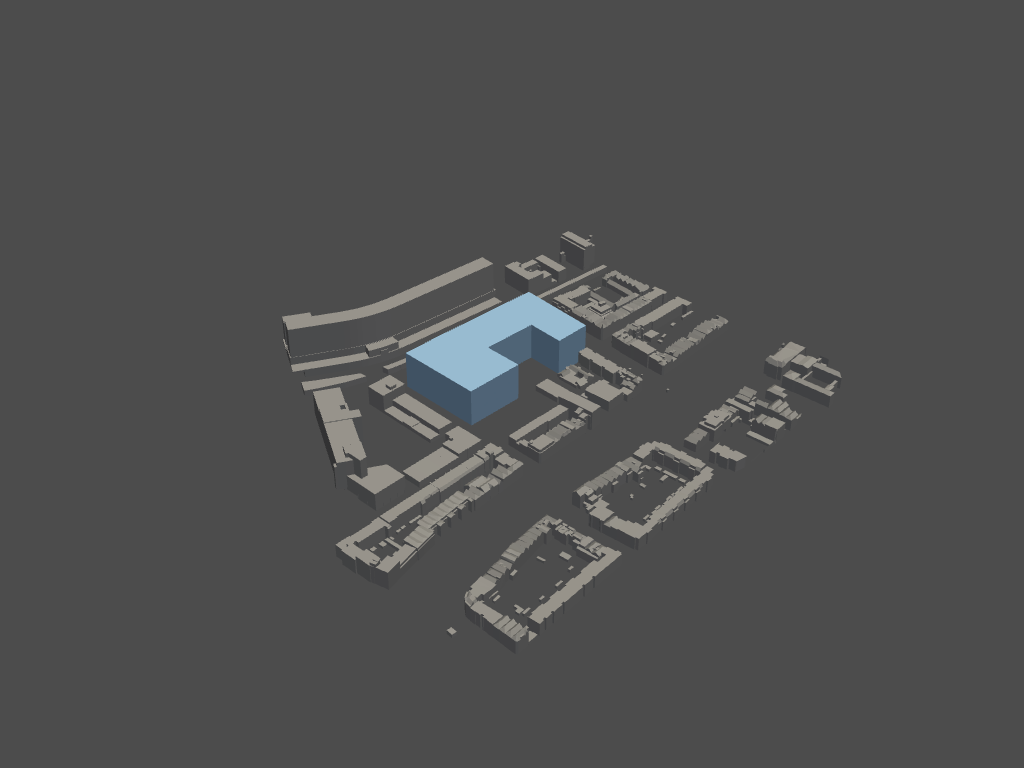

[(785.6075686833789, 708.1911636833788, 743.2184808333789),
 (65.08283250000001, -12.333572500000002, 22.69374465),
 (0.0, 0.0, 1.0)]

In [3]:
# initiating the plotter
p = pv.Plotter(notebook=True)

# adding the meshes
p.add_mesh(tri_to_pv(envelope_mesh), color='#abd8ff')
p.add_mesh(tri_to_pv(context_mesh), color='#aaaaaa')

# plotting
p.show()

In [4]:
# load lattices from before
lattice_path = os.path.relpath('../data/meshes/voxelized_envelope_highres.csv')
envelope_lattice = tg.lattice_from_csv(lattice_path)

## Visaulization of voxels

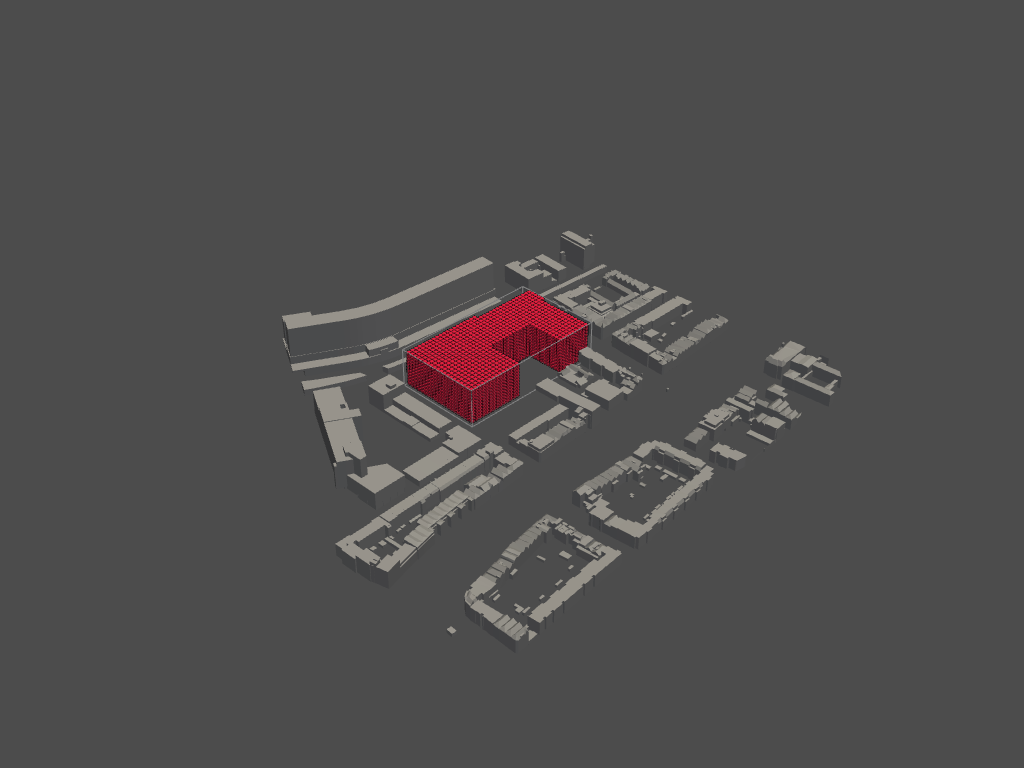

[(785.7351488880344, 708.3187438880343, 742.5460610261134),
 (65.08283250000001, -12.333572500000002, 21.89374463807907),
 (0.0, 0.0, 1.0)]

In [5]:
# initiating the plotter
p = pv.Plotter(notebook=True)

# adding the meshes
envelope_lattice.fast_vis(p)
p.add_mesh(tri_to_pv(context_mesh), color='#aaaaaa')

# plotting
p.show()

name

## Calculate ground proximity

In [6]:
ground_proximity = envelope_lattice.astype(int)
ground_proximity[ground_proximity == 1] = envelope_lattice.centroids.flatten()[2::3] / envelope_lattice.unit[2] - 1
ground_proximity = ground_proximity.astype(int)
ground_proximity

lattice([[[ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  1, ...,  8,  9, 10],
          ...,
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0]],

         [[ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  1, ...,  8,  9, 10],
          ...,
          [ 0,  0,  1, ...,  8,  9, 10],
          [ 0,  0,  1, ...,  8,  9, 10],
          [ 0,  0,  1, ...,  8,  9, 10]],

         [[ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  1, ...,  8,  9, 10],
          ...,
          [ 0,  0,  1, ...,  8,  9, 10],
          [ 0,  0,  1, ...,  8,  9, 10],
          [ 0,  0,  1, ...,  8,  9, 10]],

         ...,

         [[ 0,  0,  0, ...,  0,  0,  0],
          [ 0,  0,  1, ...,  8,  9, 10],
          [ 0,  0,  1, ...,  8,  9, 10],
          ...,
          [ 0,  0,  1, ...,  8,  9, 10],
          [ 0,  0

## Calculate Penthouse factor

In [7]:
# set the lattice to be visualized
l = ground_proximity
# remapping
l = (l - l.min()) / (l.max()-l.min())

ground_proximity_norm_inverse=(1-l)*envelope_lattice
ground_proximity_norm_inverse

lattice([[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          ...,
          [0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 0. , 0. , ..., 0. , 0. , 0. ]],

         [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          ...,
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ]],

         [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          ...,
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 0. ]],

         ...,

         [[0. , 0. , 0. , ..., 0. , 0. , 0. ],
          [0. , 1. , 0.9, ..., 0.2, 0.1, 

## Save Ground proximity and Penthouse factor to CSV

In [8]:
ground_proximity_norm_inverse.to_csv('../data/fields/proximity_to_ground_floor.csv')

pent_house_factor = (1 - ground_proximity_norm_inverse) * envelope_lattice
pent_house_factor.to_csv('../data/fields/penthouse_factor.csv')

## Initialize visualisations

In [9]:
# set the lattice to be visualized
l = ground_proximity_norm_inverse

# initiating the plotter
p = pv.Plotter(notebook=True)

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values
grid.dimensions = l.shape
# The bottom left corner of the data set
grid.origin = l.minbound
# These are the cell sizes along each axis
grid.spacing = l.unit

# Add the data values to the cell data
grid.point_arrays["Street Access"] = l.flatten(order="F")  # Flatten the Lattice
    
# adding the volume
opacity = np.array([0,0.6,0.6,0.6,0.6,0.6,0.6]) * 1.5
p.add_volume(grid, cmap="coolwarm", opacity=opacity, shade=True, show_scalar_bar=False)

# plotting
p.show(use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(228.57595031658047, 134.07595031658047, 210.47595031658048),
 (35.69999999999999, -58.80000000000001, 17.6),
 (0.0, 0.0, 1.0)]

In [10]:
# set the lattice to be visualized
l = ground_proximity
# remapping
l = (l - l.min()) / (l.max()-l.min())

# initiating the plotter
p = pv.Plotter(notebook=True)

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values
grid.dimensions = l.shape
# The bottom left corner of the data set
grid.origin = l.minbound
# These are the cell sizes along each axis
grid.spacing = l.unit

# Add the data values to the cell data
grid.point_arrays["Street Access"] = l.flatten(order="F")  # Flatten the Lattice
    
# adding the volume
opacity = np.array([0,0.6,0.6,0.6,0.6,0.6,0.6]) * 1.5
p.add_volume(grid, cmap="coolwarm", opacity=opacity, shade=True, show_scalar_bar=False)

# plotting
p.show(use_ipyvtk=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[(228.57595031658047, 134.07595031658047, 210.47595031658048),
 (35.69999999999999, -58.80000000000001, 17.6),
 (0.0, 0.0, 1.0)]